### MLP 3: Classification - Decision Tree

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # import k-fold validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

import warnings

warnings.filterwarnings('ignore')

target_names = ['Class 0', 'Class 1', 'Class 2']

In [2]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    
    plt.title('Confusion matrix')
    plt.colorbar()
    
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

In [3]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

In [4]:
df = pd.read_csv('../processeddata/new_airlines_DT.csv')
df.head(2)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.On Time,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Time.Month.level,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,3,3,3,3,...,3,3,3,3,3,3,3,3,3.0,2.0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,1,1,2,1,...,2,1,1,1,1,1,1,1,3.0,1.0


In [5]:
col = ['# of Delays.Carrier', "Time.Month",
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', #'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather', 'Ratio_Rank']

rankedData = df[col]
rankedData.shape


(4408, 17)

In [6]:
X = rankedData.iloc[ :, :-1]
print(X.shape)
X.head()

(4408, 16)


,# of Delays.Carrier,Time.Month,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Flights.Cancelled,Flights.Delayed,Flights.Diverted,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather
0,3,6,3,3,3,3,2,3,2,3,3,3,3,3,3,3
1,1,6,1,2,1,2,2,1,0,1,1,1,1,1,1,1
2,0,6,1,0,3,2,0,0,1,1,0,1,1,3,0,2
3,0,6,1,2,0,1,1,1,1,1,0,0,1,1,1,1
4,0,6,0,1,1,1,1,0,2,0,0,0,1,1,0,1


In [7]:
y = df.iloc[ :, -1:]
y.head()

,Ratio_Rank
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0


In [8]:
X = X.to_numpy()
print(type(X))

y = y.to_numpy()
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Decision Tree Entropy

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Text(0.5, 1.0, 'Decsion Tree (Entropy) Depth')

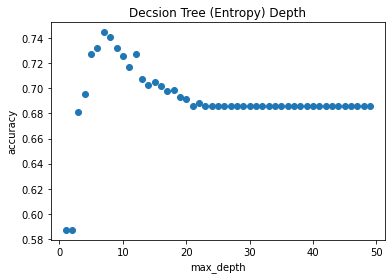

In [10]:
max_depth_range = range(1, 50) #k=15
scores = []

for k in max_depth_range:
    tree_clf_entropy = DecisionTreeClassifier(max_depth=k, criterion="entropy", random_state=42)
    tree_clf_entropy.fit(X_train, y_train)
    scores.append(tree_clf_entropy.score(X_test, y_test))

plt.figure()
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.scatter(max_depth_range, scores)
plt.title("Decsion Tree (Entropy) Depth") 

In [11]:
tree_clf_entropy = DecisionTreeClassifier(max_depth=8, criterion="entropy", random_state=42)

In [12]:
kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into k folds 


c0_precisions = []
c0_recalls = []
c1_precisions = []
c1_recalls = []
accTotal = 0
n = 1
for train_index, test_index in kf.split(X):

    print("=========================Kfold" , n , "=======================")

    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    tree_clf_entropy.fit(X_train, y_train)
    y_pred = tree_clf_entropy.predict(X_test)

    print(confusion_matrix(y_test, y_pred))

    # Get a dictionary of performance results and access the results
    results = classification_report(y_test, y_pred, target_names=target_names)
    print(results)


    metrics_dict = classification_report(y_test, y_pred, 
                        target_names=target_names, output_dict=True)

    #print(metrics_dict)

    print('precision (weighted):', metrics_dict['weighted avg']['precision'])
    print('recall avg (weighted):', metrics_dict['weighted avg']['recall'])
    accTotal = accTotal + metrics_dict['accuracy']
    print('accuracy: ', metrics_dict['accuracy'])

    n = n + 1
print('Accuracy of classifier: {:.2f}'.format((accTotal/10)))

=========================Kfold 1 =======================
[[164  34   0]
 [ 37 124  13]
 [  0  31  38]]
              precision    recall  f1-score   support

     Class 0       0.82      0.83      0.82       198
     Class 1       0.66      0.71      0.68       174
     Class 2       0.75      0.55      0.63        69

    accuracy                           0.74       441
   macro avg       0.74      0.70      0.71       441
weighted avg       0.74      0.74      0.74       441

precision (weighted): 0.7417749062825004
recall avg (weighted): 0.7392290249433107
accuracy:  0.7392290249433107
=========================Kfold 2 =======================
[[172  21   3]
 [ 40 139  10]
 [  0  25  31]]
              precision    recall  f1-score   support

     Class 0       0.81      0.88      0.84       196
     Class 1       0.75      0.74      0.74       189
     Class 2       0.70      0.55      0.62        56

    accuracy                           0.78       441
   macro avg       0.76     

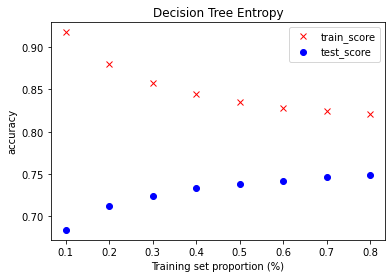

In [13]:
t = [x/10 for x in range(1, 9)]

plt.figure()

for s in t:
    #print(s)

    train_score = []
    test_score = []
    for i in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        tree_clf_entropy.fit(X_train, y_train)
        train_score.append(tree_clf_entropy.score(X_train, y_train))
        test_score.append(tree_clf_entropy.score(X_test, y_test))
    plt.plot(s, np.mean(train_score), 'rx')
    plt.plot(s, np.mean(test_score), 'bo')
    plt.legend(['train_score', 'test_score'], loc='best')
    plt.title("Decision Tree Entropy")  

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

### Decision Tree GINI

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Text(0.5, 1.0, 'Decsion Tree (gini) Depth')

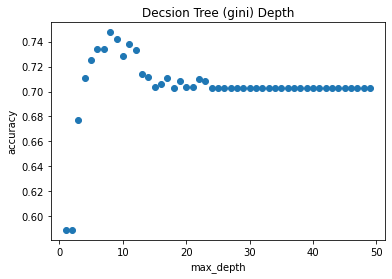

In [15]:
max_depth_range = range(1, 50) #k=15
scores = []

for k in max_depth_range:
    tree_clf_gini = DecisionTreeClassifier(max_depth=k, criterion="gini", random_state=42)
    tree_clf_gini.fit(X_train, y_train)
    scores.append(tree_clf_gini.score(X_test, y_test))

plt.figure()
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.scatter(max_depth_range, scores)
plt.title("Decsion Tree (gini) Depth") 

In [16]:
tree_clf_gini = DecisionTreeClassifier(max_depth=8, criterion="gini", random_state=42)

In [17]:
kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into k folds 

c0_precisions = []
c0_recalls = []
c1_precisions = []
c1_recalls = []
accTotal = 0
n = 1
for train_index, test_index in kf.split(X):

    print("=========================Kfold" , n , "=======================")

    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    tree_clf_gini.fit(X_train, y_train)
    y_pred = tree_clf_gini.predict(X_test)

    print(confusion_matrix(y_test, y_pred))

    # Get a dictionary of performance results and access the results
    results = classification_report(y_test, y_pred, target_names=target_names)
    print(results)


    metrics_dict = classification_report(y_test, y_pred, 
                        target_names=target_names, output_dict=True)

    #print(metrics_dict)

    print('precision (weighted):', metrics_dict['weighted avg']['precision'])
    print('recall avg (weighted):', metrics_dict['weighted avg']['recall'])
    accTotal = accTotal + metrics_dict['accuracy']
    print('accuracy: ', metrics_dict['accuracy'])

    n = n + 1
#print(accTotal/KFoldNum)
print('Accuracy of classifier: {:.2f}'.format((accTotal/10)))

=========================Kfold 1 =======================
[[158  41   2]
 [ 33 138  11]
 [  1  26  31]]
              precision    recall  f1-score   support

     Class 0       0.82      0.79      0.80       201
     Class 1       0.67      0.76      0.71       182
     Class 2       0.70      0.53      0.61        58

    accuracy                           0.74       441
   macro avg       0.73      0.69      0.71       441
weighted avg       0.75      0.74      0.74       441

precision (weighted): 0.7455486610756645
recall avg (weighted): 0.7414965986394558
accuracy:  0.7414965986394558
=========================Kfold 2 =======================
[[158  38   0]
 [ 37 128  23]
 [  0  17  40]]
              precision    recall  f1-score   support

     Class 0       0.81      0.81      0.81       196
     Class 1       0.70      0.68      0.69       188
     Class 2       0.63      0.70      0.67        57

    accuracy                           0.74       441
   macro avg       0.71     

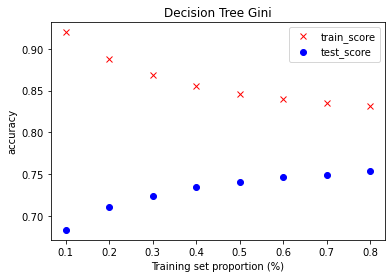

In [18]:
t = [x/10 for x in range(1, 9)]

plt.figure()

for s in t:
    #print(s)

    train_score = []
    test_score = []
    for i in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        tree_clf_gini.fit(X_train, y_train)
        train_score.append(tree_clf_gini.score(X_train, y_train))
        test_score.append(tree_clf_gini.score(X_test, y_test))
    plt.plot(s, np.mean(train_score), 'rx')
    plt.plot(s, np.mean(test_score), 'bo')
    plt.legend(['train_score', 'test_score'], loc='best')
    plt.title("Decision Tree Gini") 

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');